In [45]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [46]:
a = 0.5
b = 0.3
n = 1000000
s = 990000
i = 7000
r = 3000
t0, tf = 0, 25

In [47]:
def dsdt(t, s):
    return - a * s


soln = solve_ivp(dsdt, (t0, tf), [s], dense_output=True)
soln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb549943510>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

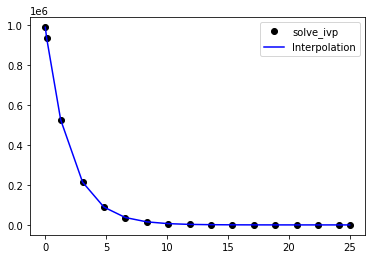

In [48]:
ts, ys = soln.t, soln.y[0]
zs, = soln.sol(ts)
plt.plot(ts, ys, 'o', color='k', label='solve_ivp')
plt.plot(ts, zs, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [49]:
def didt(t, i):
    return a*s-b*i


soln_i = solve_ivp(didt, (t0, tf), [r], dense_output=True)
soln_i

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb549897390>
   status: 0
  success: True
        t: array([0.00000000e+00, 6.07164542e-03, 6.67880996e-02, 6.73952641e-01,
       2.88421292e+00, 5.66334925e+00, 9.02062718e+00, 1.30440053e+01,
       1.79447535e+01, 2.40886640e+01, 2.50000000e+01])
 t_events: None
        y: array([[   3000.        ,    5997.26941773,   35671.59591291,
         304494.64304048,  956665.39841455, 1348701.26730705,
        1539808.64438947, 1616877.54489342, 1642210.88978792,
        1648591.63848142, 1648928.53552678]])
 y_events: None

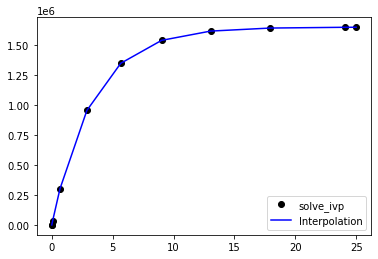

In [50]:
ti, yi = soln_i.t, soln_i.y[0]
zi, = soln_i.sol(ti)
plt.plot(ti, yi, 'o', color='k', label='solve_ivp')
plt.plot(ti, zi, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [51]:
def drdt(t, r, args=(soln_i, soln)):
    return n - soln.sol(t) - soln_i.sol(t)


soln_r = solve_ivp(drdt, (t0, tf), [r], dense_output=True)
soln_r

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb5496c4b10>
   status: 0
  success: True
        t: array([ 0.        ,  0.08441209,  0.92853303,  2.48261411,  6.24980389,
       13.6364726 , 25.        ])
 t_events: None
        y: array([[ 3.00000000e+03,  3.58430576e+03, -1.14382682e+03,
        -1.35262690e+05, -1.30440824e+06, -5.44019813e+06,
        -1.27387060e+07]])
 y_events: None

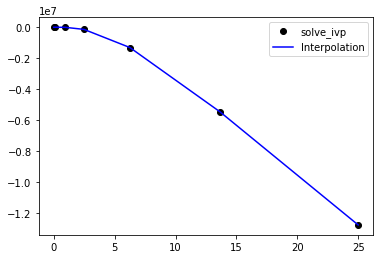

In [52]:
tr, yr = soln_r.t, soln_r.y[0]
zr, = soln_r.sol(tr)
plt.plot(tr, yr, 'o', color='k', label='solve_ivp')
plt.plot(tr, zr, color='blue', label='Interpolation')
plt.legend()
plt.show()

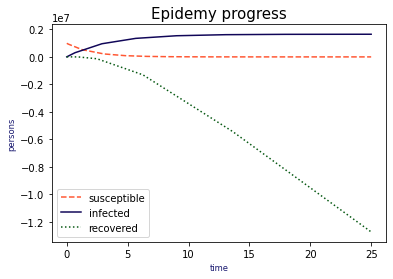

In [53]:
plt.plot(
    ts,
    zs,
    label="susceptible",
    linestyle="--",
    color="#FF5733",
)
plt.plot(
    ti,
    zi,
    label="infected",
    linestyle="-",
    color="#100658",
)
plt.plot(
    tr,
    zr,
    label="recovered",
    linestyle=":",
    color="#065812",
)
plt.xlabel("time", fontsize="small", color="midnightblue")
plt.ylabel("persons", fontsize="small", color="midnightblue")
plt.title("Epidemy progress", fontsize=15)
plt.legend()
plt.show()